# Projeto Aplicado
>Curso de Estatística para Ciência de Dados e Business Analytics

## Conjunto de dados

<font size=4.5><b>Pesquisa Nacional por Amostra de Domicílios - 2015</b></font>

<p style='text-align: justify;'><font size=3.5>A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> tinha periodicidade anual e pequisava, de forma permanente, características gerais da população como educação, trabalho, rendimento e habitação e outras. O levantamento dessas estatísticas constituiu, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil. A PNAD foi  encerrada em 2016 e substituída, com metodologia atualizada, pela Pesquisa Nacional por Amostra de Domicílios Contínua - PNAD Contínua.</font></p>

<font size=2><b>Fonte dos dados</b>: https://www.ibge.gov.br/estatisticas/sociais/educacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados</font>

## Dicionário dos dados

> **Renda**: rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.
> ***
> **Idade**: idade do morador na data de referência em anos.
> ***
> **UF**:
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> **Sexo**	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> **Anos de Estudo**
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> **Cor**
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### Observação
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

## Bibliotecas básicas e outras inicializações

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use(['ggplot'])

plt.rcParams['axes.facecolor']='white'
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

%run mapaVariaveis.py

## Carregamento dos dados

In [2]:
##Falar sobre o significado das colunas, tipo de dados e tamanho da base e as observações:
# Foram eliminados os registros onde a Renda era inválida (999 999 999 999);
# Foram eliminados os registros onde a Renda era missing;
# Foram considerados somente os registros das Pessoas de Referência de cada domicílio (responsável pelo domicílio).

In [3]:
df = pd.read_csv('dataset/dados.csv')
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')
df.head(5)

Linhas: 76840 | Colunas: 6


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda
0,11,0,23,8,12,800
1,11,1,23,2,12,1150
2,11,1,35,8,15,880
3,11,0,46,2,6,3500
4,11,1,47,8,9,150


## Informação dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   UF              76840 non-null  int64
 1   Sexo            76840 non-null  int64
 2   Idade           76840 non-null  int64
 3   Cor             76840 non-null  int64
 4   Anos de Estudo  76840 non-null  int64
 5   Renda           76840 non-null  int64
dtypes: int64(6)
memory usage: 3.5 MB


## Comportamento variável Renda

<p style='text-align: justify;'><font size=2.85>Para avaliar o comportamento da variável RENDA, foi construida uma tabela de frequências considerando as seguintes classes em salários mínimos:</font></p>

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

<p style='text-align: justify;'><font size=2.85>O salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.</font></p>

Tabela de frequência

In [5]:
print('Intevalos das classes: de %s até %s reais' % (df['Renda'].min(), df['Renda'].max()))
classes = [df['Renda'].min(), 1576, 3940, 11820, 19700, df['Renda'].max()]

labels = ['E', 'D', 'C', 'B', 'A']
frequencia = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True))
frequencia

Intevalos das classes: de 0 até 200000 reais


E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

Coluna de percentuais

In [6]:
percentual = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True), normalize=True)
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual})
dist_freq.sort_index(ascending=False)

,Frequência,Percentual (%)
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


Gráfico de barras

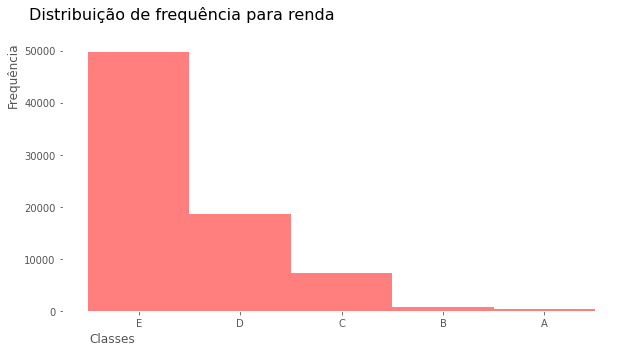

In [7]:
dist_freq['Frequência'].plot.bar(width=1, color='red', alpha=0.5, figsize=(10, 5), rot=False)
plt.title('Distribuição de frequência para renda', fontsize=16, y=1.05, loc='left', x=-0.06)
plt.xlabel('Classes', fontsize=12, horizontalalignment='right', x=0.13)
plt.ylabel('Frequência', fontsize=12, horizontalalignment='left', y=0.75)
plt.show()

<p style='text-align: justify;'><font size=2.85>Boa parte da população que compõe essa base pertencem a classe E, ou seja, possuem uma renda de até 2 salários mínimos.</font></p>

## Histogramas

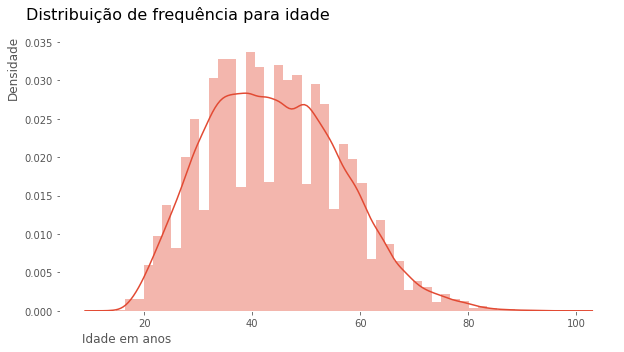

In [8]:
ax = sns.distplot(df['Idade'], kde=True)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de frequência para idade', fontsize=16, y=1.05, loc='left', x=-0.06)
ax.set_xlabel('Idade em anos', fontsize=12, horizontalalignment='right', x=0.20)
ax.set_ylabel('Densidade', fontsize=12, horizontalalignment='left', y=0.78)
plt.show()

<p style='text-align: justify;'><font size=2.85>A variável idade possui muitos picos e vales e uma curva parecida com a normal. Existe uma grande variação.</font></p>

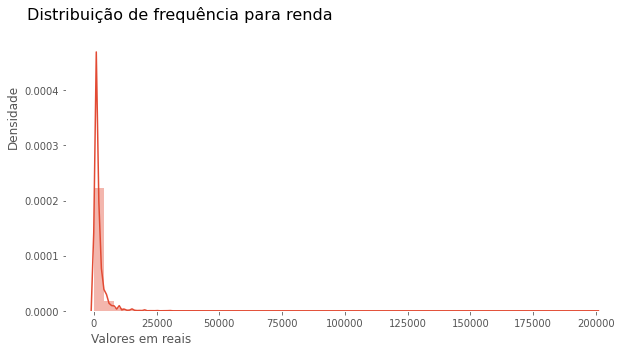

In [10]:
ax = sns.distplot(df['Renda'], kde=True)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de frequência para renda', fontsize=16, y=1.05, loc='left', x=-0.07)
ax.set_xlabel('Valores em reais', fontsize=12, horizontalalignment='right', x=0.225)
ax.set_ylabel('Densidade', fontsize=12, horizontalalignment='left', y=0.60)
plt.show()

<p style='text-align: justify;'><font size=2.85>A variável Renda possui uma assimetria à direita, o que indica que boa parte das pessoas que compõe essa base recebem salários mais baixos. Podemos ver também a existência de alguns valores mais altos.</font></p>

## Análise descritiva para a variável Renda

In [23]:
sample = df.drop(['UF', 'Sexo', 'Cor'], axis=1)
sample['Anos de Estudo'] = sample['Anos de Estudo'].map(map_anos_estudos)
sample.describe()

,Idade,Anos de Estudo,Renda
count,76840.000000,70800.000000,76840.000000
mean,44.071421,8.149054,2000.383199
std,12.480583,3.978494,3323.387730
min,13.000000,0.000000,0.000000
25%,34.000000,5.000000,788.000000
50%,43.000000,10.000000,1200.000000
75%,53.000000,10.000000,2000.000000
max,99.000000,14.000000,200000.000000


<p style='text-align: justify;'><font size=2.85>A idade média é de 44 anos com uma variação de 12,5 anos. A idade varia entre 13 e 99 anos e os anos passados na escola eram, em média, 8 com 25% da nossa amostra tendo estudado 5 anos ou menos.</font></p>
<p style='text-align: justify;'><font size=2.85>A renda média das famílias, em 2015, era de 2000,38 reais com uma variação de 3323,38 reais. Metade da nossa amostra recebia até 1.5 salário mínimo e cerca de 19.210 pessoas viviam com 1 salário minimo ou menos.</font></p>

## Renda por raça e sexo

<p style='text-align: justify;'><font size=2.85>Na nossa amostra, para cada 2.257 homens chefes de família, há 1 mulher. Por isso, para mantermos uma comparação justa, usaremos uma amostra aleatória equilibrada de 10000 instâncias.</font></p>

In [12]:
sample = df.groupby('Sexo').apply(lambda x : x.sample(n=10000, replace=False))
print(sample['Sexo'].value_counts(normalize=True)*100)

0    50.0
1    50.0
Name: Sexo, dtype: float64


In [13]:
analise_renda = pd.crosstab(sample['Cor'], sample['Sexo'], values=sample['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
analise_renda.rename(index=cor, inplace=True)
analise_renda.rename(columns=sexo, inplace=True)
analise_renda

max                   mean                 median           \
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino   
Cor                                                                         
Indígena    4000.0  120000.0   974.673913  3750.673913     788.0    788.0   
Branca     80000.0   60000.0  2932.286058  2074.693548    1800.0   1200.0   
Preta      15000.0   15648.0  1547.855502  1135.714636    1200.0    800.0   
Amarela    28000.0   20000.0  4711.655172  3237.744681    2500.0   1500.0   
Parda     100000.0   24500.0  1710.502878  1182.091246    1200.0    800.0   

                  std                
Sexo        Masculino      Feminino  
Cor                                  
Indígena   995.110805  17600.434863  
Branca    4016.997578   2976.205161  
Preta     1367.395741   1300.997893  
Amarela   5648.675686   4438.347374  
Parda     2872.466638   1535.738995

<p style='text-align: justify;'><font size=2.85>Homens indígenas e mulheres negras eram o grupo que possuem a renda média mais baixa. Analisado a mediana, percebemos que, em geral, os homens possuiam renda superior a das mulheres.</font></p>

## Renda por anos de estudo separado por sexo

In [14]:
analise_renda_2 = pd.crosstab(sample['Anos de Estudo'], sample['Sexo'], values=sample['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
analise_renda_2.rename(index=anos_de_estudo, inplace=True)
analise_renda_2.rename(columns=sexo, inplace=True)
analise_renda_2

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   15000.0   10000.0   837.170670   523.784588   
1 ano                            10000.0    2000.0   915.156566   493.736000   
2 anos                           10000.0    1500.0   917.598684   495.642857   
3 anos                           80000.0    2300.0  1326.764302   563.875000   
4 anos                           15000.0    5000.0  1297.357985   706.634831   
5 anos                           14000.0    5000.0  1298.481356   775.105751   
6 anos                           15000.0    6000.0  1443.837500   862.398649   
7 anos                           40000.0    9000.0  1467.116618   824.753894   
8 anos                           20000.0   16000.0  1730.142329   945.687951   
9 anos                           30000.0    3500.0  1611.297872   894.008368   
10 anos                          15000.0    5000.0  1564.655914   920.860215   
11 anos                          30000.0   50000.0  2083.627765  1282.308529   
12 anos                          15000.0  120000.0  2394.168831  1826.685121   
13 anos                          18000.0   20000.0  3186.045752  1913.857955   
14 anos                          25000.0   15000.0  3678.500000  2238.472000   
15 anos ou mais                 100000.0   60000.0  6101.060144  3865.050443   
Não determinados                  3600.0    3000.0  1299.090909   797.384615   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     778.0    350.0  1101.924749   712.931286  
1 ano                              788.0    400.0  1019.819508   436.806153  
2 anos                             788.0    400.0  1016.912370   412.414771  
3 anos                             800.0    600.0  4132.925027   423.708967  
4 anos                            1000.0    788.0  1098.925579   543.614821  
5 anos                            1000.0    788.0  1110.296306   564.304327  
6 anos                            1200.0    788.0  1245.677509   595.378105  
7 anos                            1100.0    788.0  2306.808329   682.163923  
8 anos                            1400.0    800.0  1638.714293   939.795919  
9 anos                            1300.0    791.0  2053.372210   585.667062  
10 anos                           1200.0    800.0  1434.388348   641.894144  
11 anos                           1500.0    992.0  1978.352387  1497.503142  
12 anos                           1800.0   1200.0  1852.765198  7048.143583  
13 anos                           2300.0   1295.0  2735.317032  2116.077629  
14 anos                           2500.0   1549.0  3668.149076  2110.694378  
15 anos ou mais                   4061.0   2700.0  6790.018413  3971.206238  
Não determinados                  1000.0    788.0   959.889424   553.859597

<p style='text-align: justify;'><font size=2.85>Como regra geral, quanto mais anos de estudo, maior é a média salarial. Percebemos que, a média salarial dos homens era superior a das mulheres para todos os níveis de escolaridade.</font></p>

<p style='text-align: justify;'><font size=2.85>Existem casos em que, mesmo com mais anos de estudos, o salário das mulheres era inferior ao de homens com menos instrução. Por exemplo, a média para uma mulher que estudou 6 anos era de 805.71 reais , valor inferior à média para homens com 2 anos de instrução (1005.60 reais). Se olharmos a mediana, ambos passam a receber o mesmo valor de 1 salário mínimo.</font></p>

## Boxplot Renda

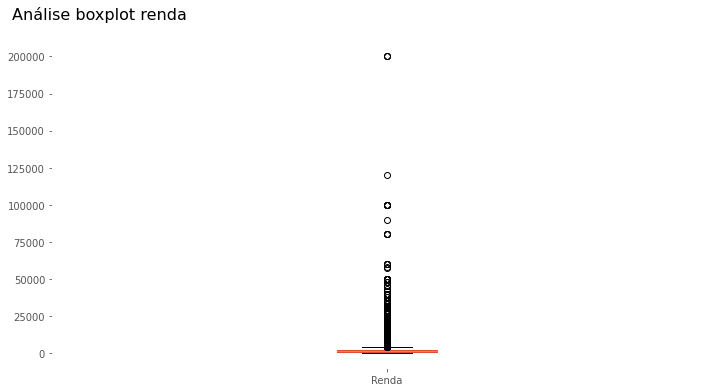

In [15]:
df.boxplot(['Renda'], figsize=(12, 6))
plt.title('Análise boxplot renda', fontsize=16, y=1.05, loc='left', x=-0.06)
plt.show()

<p style='text-align: justify;'><font size=2.85>Podemos ver que existem possíveis outliers na nossa amostra. Também temos uma cauda para a direita, o que indica uma grande concentração em salário mais baixos.</font></p>

## Análise de correlação

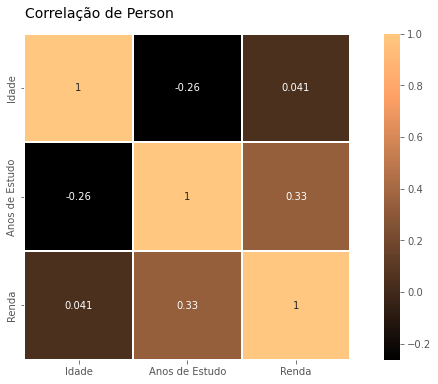

In [16]:
df['Anos de Estudo'] = df['Anos de Estudo'].map(map_anos_estudos)
corr = df.drop(['UF', 'Sexo', 'Cor'], axis=1).corr()

plt.figure(figsize=(12, 6))
plt.title('Correlação de Person', y=1.03, size=14, loc='left', x=0.001)
sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.copper, linecolor='white', annot=True)
plt.xticks(rotation=0, ha='center')
plt.show()

<p style='text-align: justify;'><font size=2.85>Parece não existir correlação entre nossas varáveis, uma vez que todas possuem um grau de correlação bem fraco. O maior grau de correlação está associado a renda e aos anos de Estudo.</font></p>